### Notas de aula de Computação Quântica <br> Autor: Jonas Maziero

# Codificação superdensa
A codificação superdensa (CSD) é uma forma de __enviar 2 cbits enviando "somente" 1 qubit__ (com alguns detalhes a serem discutidos a seguir). O protocolo foi proposto em
* Bennett, Charles H., and Stephen J. Wiesner. “Communication via One- and Two-Particle Operators on Einstein-Podolsky-Rosen States.” Phys. Rev. Lett. 69, 2881 (1992).

Esse protocolo funciona como segue. Alice e Bob estão em laboratórios diferentes e querem trocar bits clássicos de informação. Eles iniciam compartilhando um par de qubits em um estado maximamente emaranhado
$$|\Phi_{+}\rangle = \frac{1}{\sqrt{2}}\big(|00\rangle + |11\rangle\big).$$
O qubit da Alice é o da esquerda e o do Bob é o da direita.

Dois bits de informação podem estar nas seguintes 4 configurações
$$00,\ 01,\ 10,\ 11.$$
Seguindo, Alice percebe o seguinte efeito de __operações locais__ no estado compartilhado:
\begin{align}
(I\otimes I)|\Phi_{+}\rangle & = |\Phi_{+}\rangle, \\
(Z\otimes I)|\Phi_{+}\rangle & = (Z\otimes I)\frac{1}{\sqrt{2}}\big(|00\rangle + |11\rangle\big) = \frac{1}{\sqrt{2}}\big(|00\rangle - |11\rangle\big) = |\Phi_{-}\rangle, \\
(X\otimes I)|\Phi_{+}\rangle & = (X\otimes I)\frac{1}{\sqrt{2}}\big(|00\rangle + |11\rangle\big) = \frac{1}{\sqrt{2}}\big(|10\rangle + |01\rangle\big) = |\Psi_{+}\rangle, \\
(ZX\otimes I)|\Phi_{+}\rangle & = (ZX\otimes I)\frac{1}{\sqrt{2}}\big(|00\rangle + |11\rangle\big) = \frac{1}{\sqrt{2}}\big(-|10\rangle + |01\rangle\big) = |\Psi_{-}\rangle, \\
\end{align}
em que usamos 
\begin{equation}
Z|0\rangle = |0\rangle,\ Z|1\rangle = -|1\rangle,\ X|0\rangle = |1\rangle,\ X|1\rangle = |0\rangle,
\end{equation}
para $Z\doteq\begin{bmatrix}1&0\\0&-1\end{bmatrix}$, $X\doteq\begin{bmatrix}0&1\\1&0\end{bmatrix}$, $|0\rangle\doteq\begin{bmatrix}1\\0\end{bmatrix}$ e $|1\rangle\doteq\begin{bmatrix}0\\1\end{bmatrix}$.

Ou seja, Alice consegue preparar os quatro estados ortogonais (completamente distinguíveis) da base de Bell usando somente operações locais. Então, conforme a sequência de bits de informação que Alice quer enviar para Bob, ela realiza uma das seguintes operações para __codificação__ da informação:
\begin{align}
& 00\ \rightarrow\ I \ \rightarrow |\Phi_{+}\rangle =: |B_{00}\rangle, \\
& 01\ \rightarrow\ Z \ \rightarrow |\Phi_{-}\rangle =: |B_{01}\rangle, \\
& 10\ \rightarrow\ X \ \rightarrow |\Psi_{+}\rangle =: |B_{10}\rangle, \\
& 11\ \rightarrow\ ZX \ \rightarrow |\Psi_{-}\rangle =: |B_{11}\rangle.
\end{align}
Claro, Alice e Bob devem ter combinado essa codificação de antemão à implementação do protocolo.

Depois de feita a escolha da sequência de bits clássicos a ser enviada e de aplicar a operação local correspondente, Alice envia seu qubit para o laboratório de Bob. Uma vez recebido o qubit de Alice, Bob, em posse dos dois qubits, precisa fazer a __decodificação__ da informação clássica transmitida. Ele faz isso através de uma __medida na base de Bell__. Essa medida tem como resultado um dos quatro estados 
\begin{equation}
\{|\Phi_{+}\rangle,|\Psi_{+}\rangle,|\Phi_{-}\rangle,|\Psi_{-}\rangle\}.
\end{equation}
No IBMQ só temos medidas na base computacional 
\begin{equation}
\{|00\rangle,|01\rangle,|10\rangle,|11\rangle\}.
\end{equation}
Por isso, implementamos a medida na base de Bell primeiro aplicando uma CNOT, 
\begin{equation}
C_{x}^{10} = I\otimes|0\rangle\langle 0| + X\otimes|1\rangle\langle 1|,
\end{equation}
que tem a seguinte ação na base computacional
\begin{align}
& C_{x}^{10}|00\rangle = I|0\rangle\otimes|0\rangle\langle 0|0\rangle + X|0\rangle\otimes|1\rangle\langle 1|0\rangle = |00\rangle, \\
& C_{x}^{10}|01\rangle = I|0\rangle\otimes|0\rangle\langle 0|1\rangle + X|0\rangle\otimes|1\rangle\langle 1|1\rangle = |11\rangle, \\
& C_{x}^{10}|10\rangle = I|1\rangle\otimes|0\rangle\langle 0|0\rangle + X|1\rangle\otimes|1\rangle\langle 1|0\rangle = |10\rangle, \\
& C_{x}^{10}|11\rangle = I|1\rangle\otimes|0\rangle\langle 0|1\rangle + X|1\rangle\otimes|1\rangle\langle 1|1\rangle = |01\rangle.
\end{align}

Na sequência Bob aplica a chamada porta de Hadamard,
\begin{equation}
H=\frac{1}{\sqrt{2}}\big(Z+X\big),
\end{equation}
no qubit que estava originalmente com ele. A ação dessa porta na base computacional é a seguinte
\begin{align}
& H|0\rangle = \frac{1}{\sqrt{2}}\big(Z|0\rangle+X|0\rangle\big) = \frac{1}{\sqrt{2}}\big(|0\rangle+|1\rangle\big) =: |+\rangle, \\
& H|1\rangle = \frac{1}{\sqrt{2}}\big(Z|1\rangle+X|1\rangle\big) = \frac{1}{\sqrt{2}}\big(-|1\rangle+|0\rangle\big) =: |-\rangle, \\
\end{align}
em que definimos a base de autovetores de $X$ (verifique) como
\begin{align}
& |+\rangle = \frac{1}{\sqrt{2}}\big(|0\rangle+|1\rangle\big), \\
& |-\rangle = \frac{1}{\sqrt{2}}\big(|0\rangle-|1\rangle\big).
\end{align}
A ação da porta de Hadamard nessa base é a seguinte
\begin{align}
H|+\rangle & = \frac{1}{\sqrt{2}}\big(H|0\rangle+H|1\rangle\big)  = \frac{1}{\sqrt{2}}\big(\frac{1}{\sqrt{2}}\big(|0\rangle+|1\rangle\big) + \frac{1}{\sqrt{2}}\big(|0\rangle-|1\rangle\big)\big), \\
& = \frac{1}{2}\big(|0\rangle + |1\rangle + |0\rangle - |1\rangle\big) = |0\rangle, \\
H|-\rangle & = \frac{1}{\sqrt{2}}\big(H|0\rangle-H|1\rangle\big)  = \frac{1}{\sqrt{2}}\big(\frac{1}{\sqrt{2}}\big(|0\rangle+|1\rangle\big) - \frac{1}{\sqrt{2}}\big(|0\rangle-|1\rangle\big)\big), \\
& = \frac{1}{2}\big(|0\rangle + |1\rangle - |0\rangle + |1\rangle\big) = |1\rangle.
\end{align}

Com isso, teremos a mudança da base de Bell para a base computacional como segue
\begin{align}
(I\otimes H)C_{x}^{10}|\Phi_{+}\rangle & = (I\otimes H)\frac{1}{\sqrt{2}}\big(C_{x}^{10}|00\rangle + C_{x}^{10}|11\rangle\big) = (I\otimes H)\frac{1}{\sqrt{2}}\big(|00\rangle + |01\rangle\big) \\
& = (I\otimes H)|0\rangle\otimes\frac{1}{\sqrt{2}}\big(|0\rangle + |1\rangle\big) = (I\otimes H)(|0\rangle\otimes|+\rangle) \\
& = |00\rangle, \\
(I\otimes H)C_{x}^{10}|\Psi_{+}\rangle & = (I\otimes H)\frac{1}{\sqrt{2}}\big(C_{x}^{10}|01\rangle + C_{x}^{10}|10\rangle\big) = (I\otimes H)\frac{1}{\sqrt{2}}\big(|11\rangle + |10\rangle\big) \\
& = (I\otimes H)|1\rangle\otimes\frac{1}{\sqrt{2}}\big(|1\rangle + |0\rangle\big) = (I\otimes H)(|1\rangle\otimes|+\rangle) \\
& = |10\rangle, \\
(I\otimes H)C_{x}^{10}|\Phi_{-}\rangle & = (I\otimes H)\frac{1}{\sqrt{2}}\big(C_{x}^{10}|00\rangle - C_{x}^{10}|11\rangle\big) = (I\otimes H)\frac{1}{\sqrt{2}}\big(|00\rangle - |01\rangle\big) \\
& = (I\otimes H)|0\rangle\otimes\frac{1}{\sqrt{2}}\big(|0\rangle - |1\rangle\big) = (I\otimes H)(|0\rangle\otimes|-\rangle) \\
& = |01\rangle, \\
(I\otimes H)C_{x}^{10}|\Psi_{-}\rangle & = (I\otimes H)\frac{1}{\sqrt{2}}\big(C_{x}^{10}|01\rangle - C_{x}^{10}|10\rangle\big) = (I\otimes H)\frac{1}{\sqrt{2}}\big(|11\rangle - |10\rangle\big) \\
& = (I\otimes H)|1\rangle\otimes\frac{1}{\sqrt{2}}\big(|1\rangle - |0\rangle\big) = -(I\otimes H)(|1\rangle\otimes|-\rangle) \\
& = e^{i\pi}|11\rangle.
\end{align}

Então, uma vez que Bob aplique $C_{x}^{10}$ seguida de $I\otimes H$ seguida da medida na base computacional, ele aprende os dois bits de informação clássica que Alice gostaria de comunicar para ele. O protocolo de codificação superdensa é simulado no IBMQ conforme mostrado abaixo.

Para o que vem a seguir, um terceiro elemento, Charlie, precisa preparar um estado emaranhado de dois qubits e enviar um qubit para Alice e o outro para Bob. Partido do estado padrão no IBMQ, que é $|00\rangle$, podemos obter o estado emaranhado de Bell como segue
\begin{align}
C_{x}^{10}(I\otimes H)|00\rangle & = C_{x}^{10}|0+\rangle = C_{x}^{10}\frac{1}{\sqrt{2}}\big(|00\rangle + |01\rangle\big) = \frac{1}{\sqrt{2}}\big(|00\rangle + |11\rangle\big) \\
& = |\Phi_{+}\rangle.
\end{align}

Vale observar aqui que o protocolo de CSD envia 2 cbits enviando 1 qubit, mas para isso precisa do par emaranhado compartilhado entre Alice e Bob. Então, no final do dia, 2 qubits foram enviados para Bob. Tem a questão da ordem temporal para levar em conta aqui, mas não discutiremos esse ponto.

In [19]:
from qiskit import *
nshots = 8192
qiskit.IBMQ.load_account()
provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
simulator = Aer.get_backend('qasm_simulator')
device = provider.get_backend('ibmq_bogota')
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram

ibmqfactory.load_account:WARNING:2022-01-20 09:35:22,727: Credentials are already in use. The existing account in the session will be replaced.


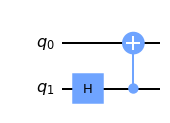

In [28]:
def qc_ent_dist():
    qc = QuantumCircuit(2, name = 'E dist')
    qc.h([1]); qc.cx(1, 0)
    return qc
qc_ent_dist_ = qc_ent_dist()
qc_ent_dist_.draw(output = 'mpl')

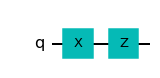

In [23]:
def qc_encoding(cbits):
    qc = QuantumCircuit(1, name = 'codificação')
    if cbits == '00':
        qc.id([0])
    elif cbits == '01':
        qc.z([0])
    elif  cbits == '10':
        qc.x([0])
    elif  cbits == '11':
        qc.x([0]); qc.z([0])
    return qc
qc_encoding_ = qc_encoding('11')
qc_encoding_.draw(output = 'mpl')

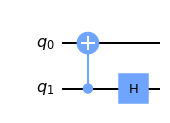

In [24]:
def qc_decoding():
    qc = QuantumCircuit(2, name = 'decodificação')
    qc.cx(1, 0); qc.h([1])
    return qc
qc_decoding_ = qc_decoding(); qc_decoding_.draw(output = 'mpl')

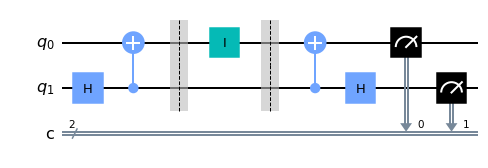

In [50]:
cbits = '00'
qc = QuantumCircuit(2, 2)
qc_ent_dist_ = qc_ent_dist(); qc.append(qc_ent_dist_, [0,1])
qc.barrier()
qc_encoding_ = qc_encoding(cbits); qc.append(qc_encoding_, [0])
qc.barrier()
qc_decoding_ = qc_decoding(); qc.append(qc_decoding_, [0,1])
qc.measure([0,1],[0,1])
#qc.draw(output = 'mpl')
qc.decompose().draw(output = 'mpl')

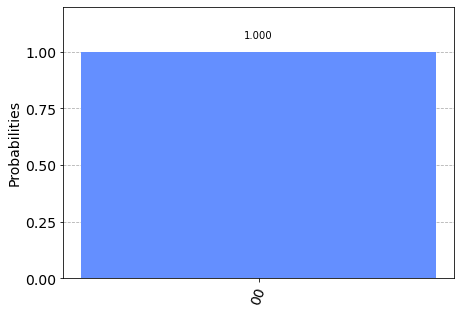

In [48]:
result = execute(qc, backend = simulator, shots = nshots).result()
plot_histogram(result.get_counts(qc))

In [35]:
job = execute(qc, backend = device, shots = nshots)
job_monitor(job)

Job Status: job has successfully run


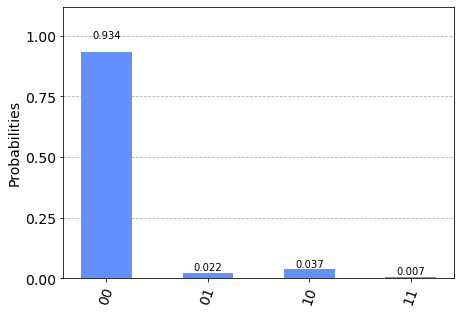

In [36]:
plot_histogram(job.result().get_counts(qc))

##### Exercício
Discuta a implementação do protocolo de codificação superdensa no caso em que Alice e Bob compartilham um estado possivelmente parcialmente emaranhado
\begin{equation}
|\Phi\rangle = \sqrt{p}|00\rangle+\sqrt{1-p}|11\rangle,
\end{equation}
com $p\in[0,1]$.

## Codificação superdensa com POVMs

Alice poderia atuar __operações locais__ (mapas CPTP) que levam o estado $|\Phi_{+}\rangle$, ou qualquer outro estado compartilhado $\rho_{AB}$, em estados que correspondem ao resultado de uma medida conjunta POVM nos sistemas $A$ e $B$. Como o número de resultados possíveis do POVM, $N$, pode ser maior que a dimensão do espaço de estados, $d_{AB}$, poderíamos aumentar assim capacidade de transmissão de comunicação clássica usando "os mesmos" recursos quânticos (número de qubits enviados). 

Em um espaço de Hilbert de dimensão $d$, em (https://arxiv.org/abs/quant-ph/0310075), os autores construíram POVMs constituídos por $d^{2}$ elementos de rank 1. Isso foi feito para $d=1,\ 2,\ 3,\ 4$. O caso $d=4$ seria útil para o problema de codificação superdensa. Se usamos cada um dos $d^{2} = 4^{2}=16$ elementos da POVM para codificar uma sequência de cbits, conseguiríamos dobrar a capacidade do protocolo de codificação superdensa, enviando 4 cbits: 
$$0000,\ 0001,\ 0010,\ 0011,\ 0100,\ 0101,\ 0110,\ 0111,\ 1000,\ 1001,\ 1010,\ 1011,\ 1100,\ 1101,\ 1110,\ 1111.$$

A princípio não vejo nenhum impecílio fundamental. Precisa verificar se Alice consegue preparar os 16 estados puros que correspodem aos elementos com rank 1 da POVM usando operações locais em um dois qubits. Se isso for possível, a princípio Bob pode realizar a medida POVM e descobir qual é a mensagem enviada por Alice.

Tem dois problemas interessantes para serem previamente estudados aqui: A preparação no IBMQ dos estados correspondentes aos elementos da POVM e a implementação da POVM de 2qubits no IBMQ.

Considere o POVM de 4 elementos que consideramos anteriormente:
\begin{align}
& M_{1} = 2^{-1/2}|0\rangle\langle 0| = 2^{-1/2}|\psi(0,0)\rangle\langle \psi(0,0)|, \\
& M_{2} = 2^{-1/2}|+\rangle\langle +| = 2^{-1/2}|\psi(\pi/2,0)\rangle\langle \psi(\pi/2,0)|, \\
& M_{3} = 2^{-1/2}|1\rangle\langle 1| = 2^{-1/2}|\psi(\pi,0)\rangle\langle \psi(\pi,0)|, \\
& M_{4} = 2^{-1/2}|-\rangle\langle -| = 2^{-1/2}|\psi(3\pi/2,0)\rangle\langle \psi(3\pi/2,0)|, 
\end{align}
em que $|\psi(\theta,\phi)\rangle = \cos(\theta/2)|0\rangle + e^{i\phi}\sin(\theta/2)|1\rangle$. Esses elementos são construídos então usando 4 estados do plano xz da esfera de Bloch separados consecutivamente por 90 graus.

Vimos é possível fazer essa medida POVM adicionado um qubit auxiliar, evoluindo os 2 qubits unitariamente e medindo o qubit auxiliar projetivamente. Então, Alice poderia preparar um dos 4 estados de um qubit
\begin{equation}
|\psi(0,0)\rangle, |\psi(\pi/2,0)\rangle, |\psi(\pi,0)\rangle, |\psi(3\pi/2,0)\rangle
\end{equation}
e enviar para Bob, que poderia fazer uma medida POVM identificando qual estado Alice preparou. Com isso Alice seria capaz de enviar 2 cbits enviando um único qubit. Mas o limite de Holevo diz que é possível estrairmos até n cbits de estados de n qubits. Qual é o problema então com essa proposta?

O problema é que não conseguimos distinguir esses 4 estados através do POVM correspondente. Por exemplo, se Alice preparou o estado $|0\rangle$ teremos as seguintes probabilidades
\begin{align}
& Pr(M_{1}|0) = \langle 0|M_{1}^{\dagger}M_{1}|0\rangle = 1/2, \\
& Pr(M_{2}|0) = \langle 0|M_{2}^{\dagger}M_{2}|0\rangle = 1/4, \\
& Pr(M_{3}|0) = \langle 0|M_{3}^{\dagger}M_{3}|0\rangle = 0, \\
& Pr(M_{4}|0) = \langle 0|M_{4}^{\dagger}M_{4}|0\rangle = 1/4.
\end{align}
Também temos
\begin{align}
& Pr(M_{1}|+) = \langle +|M_{1}^{\dagger}M_{1}|+\rangle = 1/4, \\
& Pr(M_{2}|+) = \langle +|M_{2}^{\dagger}M_{2}|+\rangle = 1/2, \\
& Pr(M_{3}|+) = \langle +|M_{3}^{\dagger}M_{3}|+\rangle = 1/4, \\
& Pr(M_{4}|+) = \langle +|M_{4}^{\dagger}M_{4}|+\rangle = 0.
\end{align}

__Exercício:__ Calcule $Pr(M_{1}|1), Pr(M_{2}|1), Pr(M_{3}|1), Pr(M_{4}|1), Pr(M_{1}|-), Pr(M_{2}|-), Pr(M_{3}|-), Pr(M_{4}|-)$.

Vemos assim que Bob não consegui distinguir os 4 estados de um qubit através da POVM considerado, sendo por conseguinte impossível decodificar a informação que Alice pretendia enviar. Parece que não dá pra burlar o __limite de Holevo__ ...

### Problema
Fornecer um POVM que distingue três estados não ortogonais,
\begin{equation}
|\psi_{1}\rangle=|0\rangle,\ |\psi_{2}\rangle=\cos(\pi/8)|0\rangle+\sin(\pi/8)|1\rangle,\ |\psi_{3}\rangle=|+\rangle, 
\end{equation}
de um qubit.